In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
%matplotlib inline

# Arquivo csv com os dados, sem a extensão.
filename = 'sub3'

In [2]:
df = pd.read_csv(f"../eval/{filename}.csv")
df.head()

n  n_threads      wtime
0    1000000          1   0.125807
1   10000000          1   1.605796
2  100000000          1  19.940907
3    1000000          2   0.115857
4   10000000          2   1.599657

In [3]:
t0 = df[df["n_threads"] == 1].groupby(by=["n"]).mean()["wtime"]
t0

n
1000000       0.120215
10000000      1.625853
100000000    19.951771
Name: wtime, dtype: float64

In [4]:
df['mean_wtime_sequential'] = df['n'].transform(lambda n: t0[n])
df.head()

n  n_threads      wtime  mean_wtime_sequential
0    1000000          1   0.125807               0.120215
1   10000000          1   1.605796               1.625853
2  100000000          1  19.940907              19.951771
3    1000000          2   0.115857               0.120215
4   10000000          2   1.599657               1.625853

In [5]:
df["speedup"] = df['mean_wtime_sequential'] / df["wtime"]
df["efficiency"] = df["speedup"] / df["n_threads"]
df.head()

n  n_threads      wtime  mean_wtime_sequential   speedup  \
0    1000000          1   0.125807               0.120215  0.955553   
1   10000000          1   1.605796               1.625853  1.012491   
2  100000000          1  19.940907              19.951771  1.000545   
3    1000000          2   0.115857               0.120215  1.037617   
4   10000000          2   1.599657               1.625853  1.016376   

   efficiency  
0    0.955553  
1    1.012491  
2    1.000545  
3    0.518809  
4    0.508188

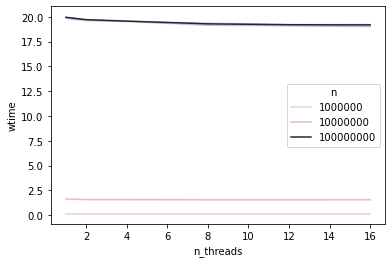

In [6]:
ax = sns.lineplot(x="n_threads", y="wtime", data=df, hue="n")
plt.savefig(f'../eval/{filename}_wtime.png', dpi=400)

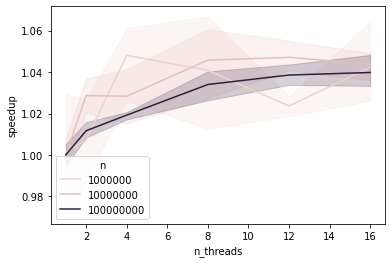

In [7]:
ax = sns.lineplot(x="n_threads", y="speedup", data=df, hue="n")
plt.savefig(f'../eval/{filename}_speedup.png', dpi=400)

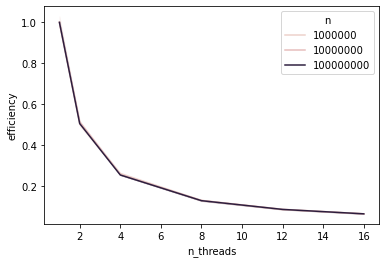

In [8]:
ax = sns.lineplot(x="n_threads", y="efficiency", data=df, hue="n")
plt.savefig(f'../eval/{filename}_efficiency.png', dpi=400)